In [1]:
from pinpoint import Tracker
import matplotlib.pyplot as plt
import time
import h5py

In [2]:
print Tracker.__doc__


	
	Tracker class for processing videos to track barcodes. 

	Parameters
	----------
	block_size : int, default = 1001
		Odd value integer. Size of the local neighborhood for adaptive thresholding.
	offset : default = 2
		Constant subtracted from the mean for adaptive thresholding. Normally, it is positive but 
		may be zero or negative as well. The threshold value is calculated as the mean of the 
		block_size x block_size neighborhood *minus* the offset.
	area_range : tuple, default (10,10000)
		Area range in pixels for potential barcodes. If the minimum value is too low this
		can lead to false positives.
	tolerance : int or float, default = 0.1
		This parameter affects how many many contours reach the barcode matching algorithm, 
		as only polygons with 4 vertices are used. This is the toleracne for fitting a polygon as a 
		proportion of the perimeter of the contour. This value is used to set epsilon, which is the 
		maximum distance between the original contour and its polygon ap

In [3]:
print Tracker.track.__doc__


		Process frames to track barcodes. Saves data to hdf5 file. See `Notes` for details.

		Parameters
		----------
		filename : str, default = 'output.h5'
			The file to save data to. 
		batch_size : int, default is 8
			The number of frames to process in each batch.
			
		Notes
		-----
		The tracker outputs data as an hdf5 file with the following structure:
			--filename
			----/data
			------/frame_idx
			------/corners
			------/identity
			------/distances
		frame_idx : ndarray, dtype=int, shape (n_samples, 1)
			the frame index number from the video for each sample 
		corners : ndarray, dtype=float, shape (n_samples, 4, 2)
			The corners for each barcode for all frames
		identity : ndarray, dtype=int, shape (n_samples, 1)
			The nearest identity for each sample
		distances : ndarray, dtype=int, shape (n_samples, 1)
			The Hamming distance for each sample to the 
			nearest neighbor from the barcode dictionary
			
			
		Returns
		-------
		gray : ndarray, (height, width, 1)
			Singl

In [13]:
tracker = Tracker("/Users/jake/Google Drive/taggedfish/cichlids_mixed_tag_sizes.mp4",
                  block_size=201,
                  offset=-40,
                  distance_threshold=20,
                  area_range=(250,2000),
                  tolerance=0.07,
                  channel='green',
                  resize=2)

In [14]:
tracker.load_dict('/Users/jake/Google Drive/barcodes/robust_8bit_barcodes/master_list.pkl')

True

In [15]:
t0 = time.time()
gray, thresh, pixels_array, points_array, best_id_list, distances = tracker.track('output.h5',batch_size=100)
t1 = time.time()
dt = t1-t0
fps = tracker.total_frames()/dt
print fps

628.963466245


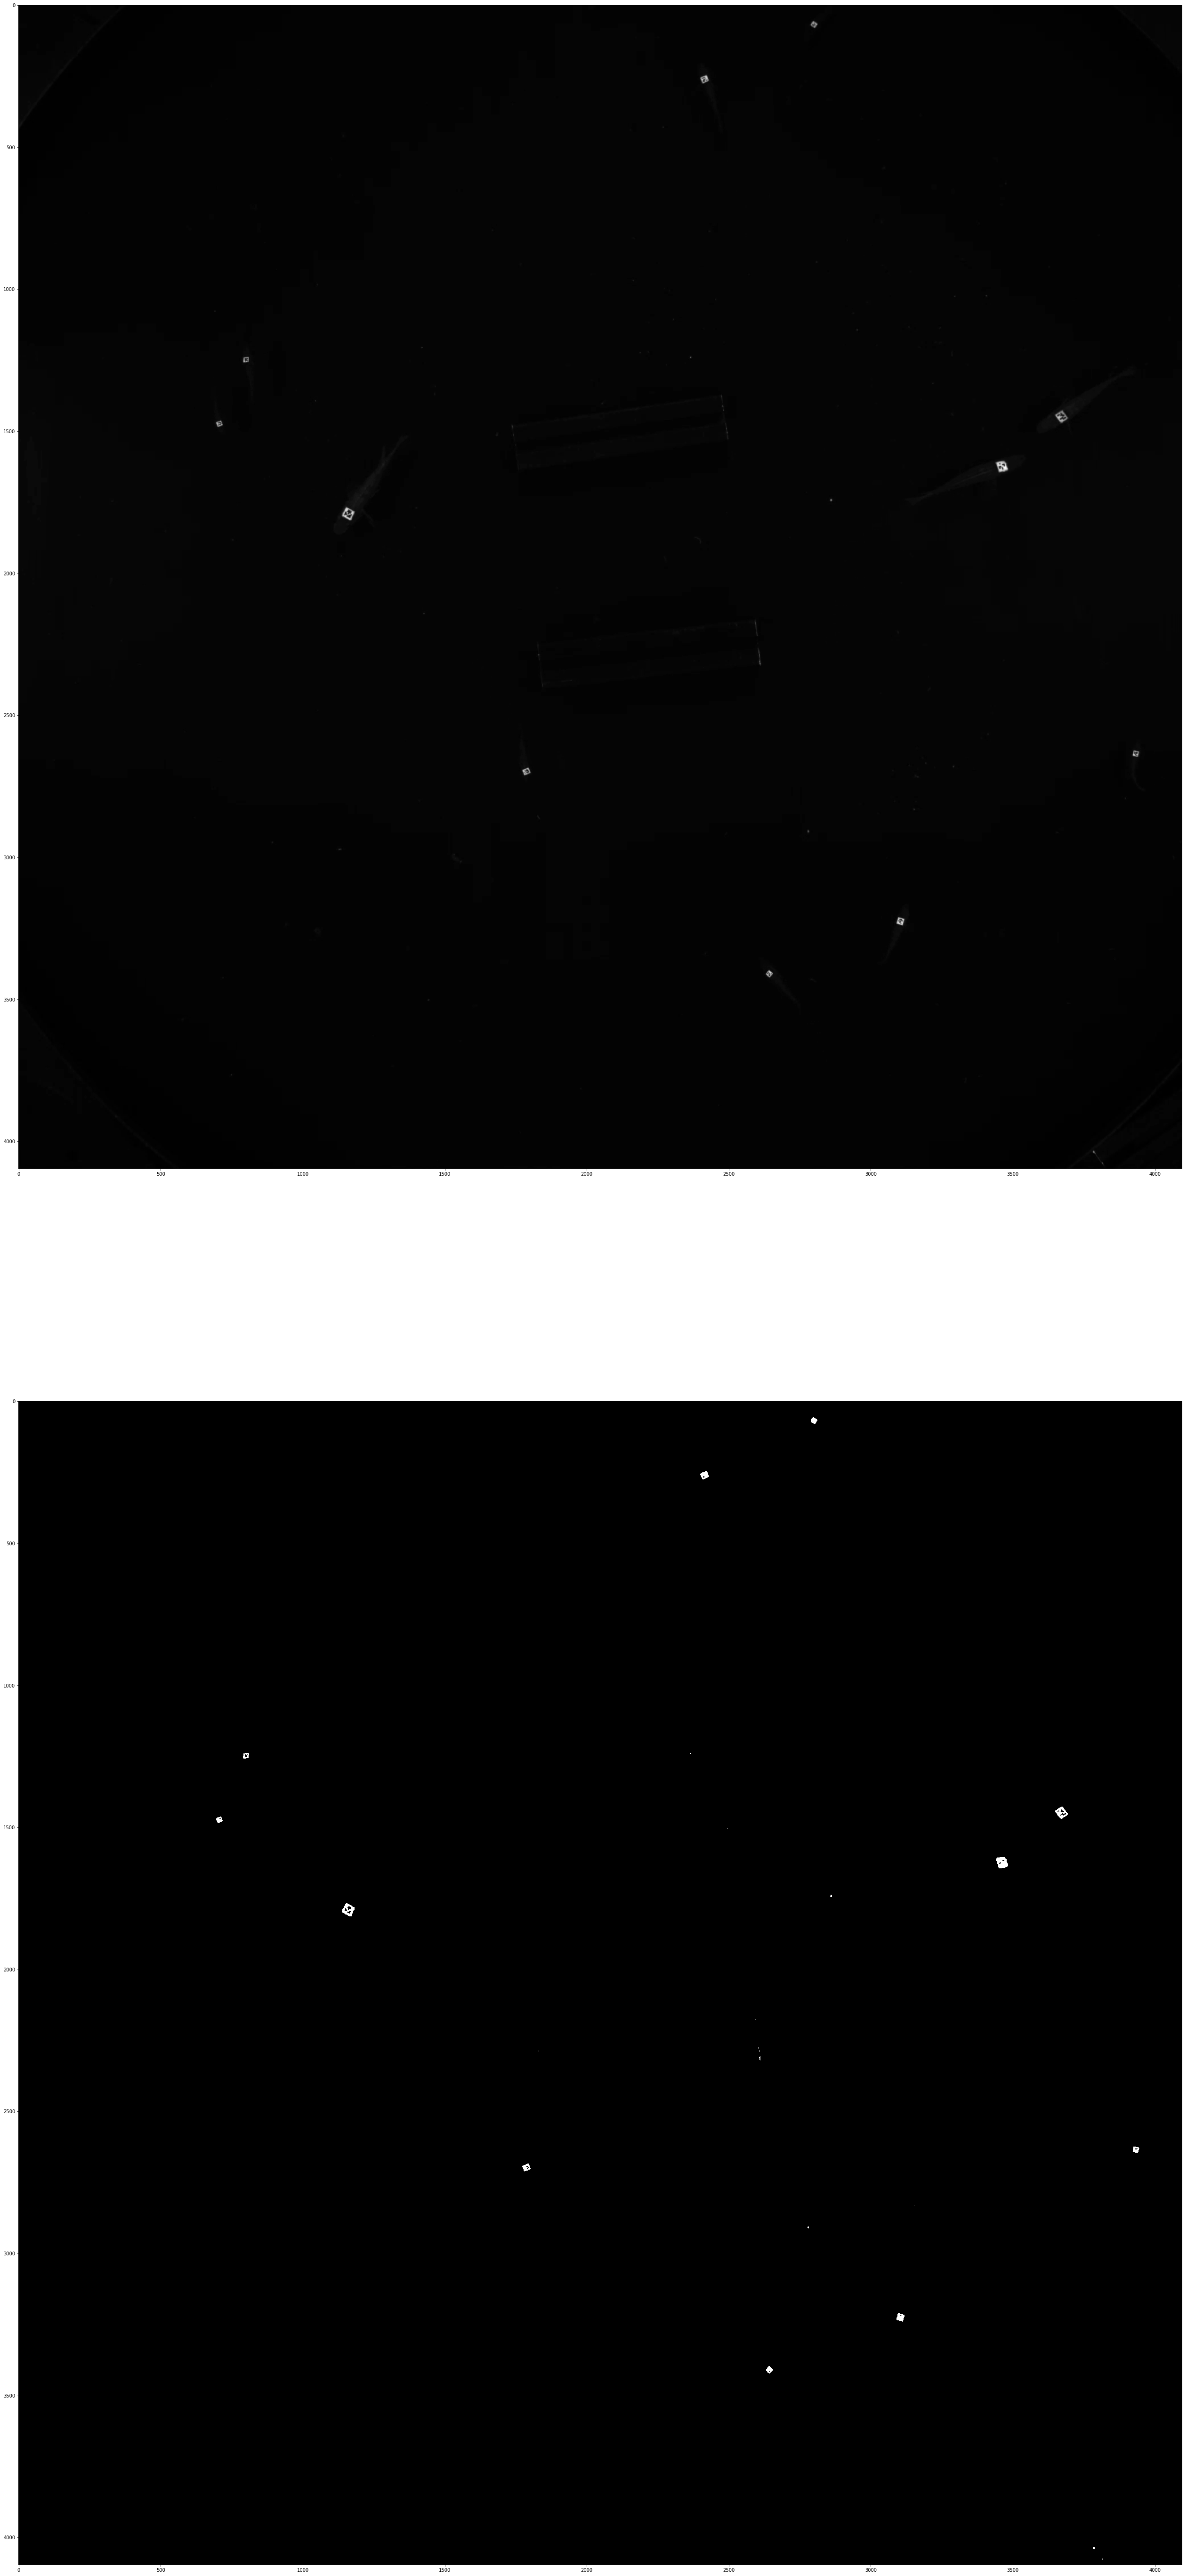

In [25]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, squeeze=True, figsize=(50,100))
ax1.imshow(gray, cmap='gray', interpolation='none')
ax2.imshow(thresh, cmap='gray', interpolation='none')
plt.show()

In [17]:
f = h5py.File('output.h5', 'r')
frame_idx = f['data/frame_idx'].value
corners = f['data/corners'].value
ind = f['data/identity'].value
dists = f['data/distances'].value
f.close()

In [18]:
corners

array([[[ 1552.90136719,  1608.57702637],
        [ 1542.52807617,  1605.44873047],
        [ 1539.1295166 ,  1616.34301758],
        [ 1549.46569824,  1619.60778809]],

       [[ 1960.31164551,  1343.98120117],
        [ 1956.56970215,  1351.79907227],
        [ 1964.73730469,  1355.58239746],
        [ 1968.68127441,  1347.72692871]],

       [[  819.70684814,  1181.38696289],
        [  827.77478027,  1173.00598145],
        [  820.35766602,  1165.57775879],
        [  812.27380371,  1173.89306641]],

       ..., 
       [[ 1824.55114746,   721.06732178],
        [ 1836.77905273,   734.59051514],
        [ 1847.58349609,   726.60614014],
        [ 1837.58605957,   713.06427002]],

       [[  405.34719849,   619.66168213],
        [  397.02609253,   619.77313232],
        [  396.23358154,   628.34643555],
        [  404.65890503,   627.61175537]],

       [[ 1210.88806152,   122.96977997],
        [ 1200.32409668,   127.53097534],
        [ 1204.75073242,   137.28884888],
        [ 1

In [19]:
best_id_list

array([ 35,  31,  38,   3, 117, 115,  13, 116,  17,  35])

In [20]:
distances

array([ 0.,  1.,  3.,  4.,  0.,  0.,  2.,  0.,  3.,  1.])